In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
  
# od.download(
    # "https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text")

In [ ]:
# path = "/content/emotion-detection-from-text/tweet_emotions.csv"

path ="/content/drive/MyDrive/Capstone/NUS 2022 capstone data/sensitised_IG_RnR_datasets_unlabelled.xlsx"
df = pd.read_excel(path)
df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  after removing the cwd from sys.path.


,Unnamed: 0,group,id,text,time,likes,comments,type,post_id,comment_id
0,0,0,b'gAAAAABjHm_3KJqQ0Puy5E0qx7aSFaPgpJgzj2VfyqSq...,"In part 2 of her article, N.H Rahman analyses ...",2021-12-18 14:58:28+00:00,35.0,0.0,Post,NaN,NaN
1,1,1,b'gAAAAABjHm_3kb8EzGpgeWj3Li43UUnwWptuLG8UScoD...,Hidayah Amin is a force to be reckoned with. H...,2021-12-15 18:00:33+00:00,100.0,0.0,Post,NaN,NaN
2,2,1,b'gAAAAABjHm_3IeZwyI1JgEhH06z_v1eH1bO6SF5srZ1Z...,"This year, we get up close and personal with t...",2021-12-14 18:01:04+00:00,72.0,2.0,Post,NaN,NaN
3,3,2,b'gAAAAABjHm_3sa6l1Gtj7SwhK-NwWWuOTCQ5N5k4lREZ...,Edwin Tong strikes again\n#ig_sg #sg #singapor...,2021-12-14 09:59:12+00:00,2516.0,9.0,Post,NaN,NaN
4,4,2,b'gAAAAABjHm_3pzmeiNxNzbfPConksXc53esE_CiwS00n...,Congratulations Loh Kean Yew! He just best the...,2021-12-14 00:48:54+00:00,3519.0,31.0,Post,NaN,NaN


In [ ]:
df.shape


(47952, 10)

In [ ]:
df["text"] = df["text"].str.lower()
df["text"] = df["text"].astype(str)
df["text"] = df["text"].replace("na", None)


In [ ]:
df.isna().sum()

Unnamed: 0        0
group             0
id                0
text              0
time              0
likes         43805
comments      43805
type              0
post_id        4147
comment_id    36701
dtype: int64

In [ ]:
data_text = df[~df["text"].isna()][['text']]


In [ ]:
data_text['index'] = data_text.index
documents = data_text


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer 
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

- All stopwords are removed
- Words that have fewer than 3 characters are removed.
- Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
- Words are stemmed — words are reduced to their root form.

In [ ]:
added_stopwords = ["http", "bgaabha"] # to be changed based on context
def lemmatize_stemming(text):
  stemmer = SnowballStemmer(language='english')
  #It is a stemming algorithm which is also known as the Porter2 stemming algorithm as 
  #it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.
  return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    text=str(text)
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in added_stopwords and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
documents

,text,index
0,"in part 2 of her article, n.h rahman analyses ...",0
1,hidayah amin is a force to be reckoned with. h...,1
2,"this year, we get up close and personal with t...",2
3,edwin tong strikes again\n#ig_sg #sg #singapor...,3
4,congratulations loh kean yew! he just best the...,4
...,...,...
47947,@bgaabha0ol shut the fuck up man you know what...,47947
47948,"@bgaabhabyo haha yeah, omg it does doesnt it!😂...",47948
47949,@bgaabhapm9 i want donkey i don't want goat. h...,47949
47950,@bgaabhajwq may i know the email that i have t...,47950


In [ ]:
#data cleaning

documents["text"] = documents["text"].str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?",'', regex=True)

In [ ]:
# example
doc_sample = documents[documents['index'] == 1320].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word.lower())
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['the', 'amount', 'of', 'stories', 'we', 'are', 'receiving', 'where', 'teachers', 'are', 'not', 'merely', 'indifferent', 'but', 'actually', 'complicit', 'is', 'quite', 'disturbingwe', 'really', 'hope', 'all', 'students', 'today', 'know', 'that', 'they', 'can', 'and', 'should', 'call', 'it', 'out', 'should', 'such', 'incidents', 'occur', 'todaywe', 'must', 'make', 'sure', 'that', 'what', 'happened', 'to', 'us', 'ends', 'with', 'us', 'no', 'child', 'should', 'ever', 'be', 'made', 'to', 'feel', 'alone', 'or', 'scared', 'in', 'classrooms', 'againcallitoutsg']


 tokenized and lemmatized document: 
['stori', 'receiv', 'teacher', 'mere', 'indiffer', 'actual', 'complicit', 'disturbingw', 'hope', 'student', 'today', 'know', 'incid', 'occur', 'todayw', 'sure', 'happen', 'end', 'child', 'feel', 'scar', 'classroom']


In [ ]:
processed_docs = documents["text"].map(preprocess)
processed_docs

0    [articl, rahman, analys, bureaucrat, solut, of...
1    [hidayah, amin, forc, reckon, tenac, preserv, ...
2    [year, close, person, changemak, communiti, yo...
3    [edwin, tong, strike, againigsg, singapor, igs...
4      [congratul, kean, best, world, olymp, champion]
5    [oklisten, agonis, silenc, edwinview, video, p...
6    [read, report, scientif, studi, prepar, nation...
7    [welcom, pritam, singh, masterclassfor, skepti...
8                                  [repost, bgaabhdit]
9    [meme, bear, swipe, templateigsg, singapor, ig...
Name: text, dtype: object

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

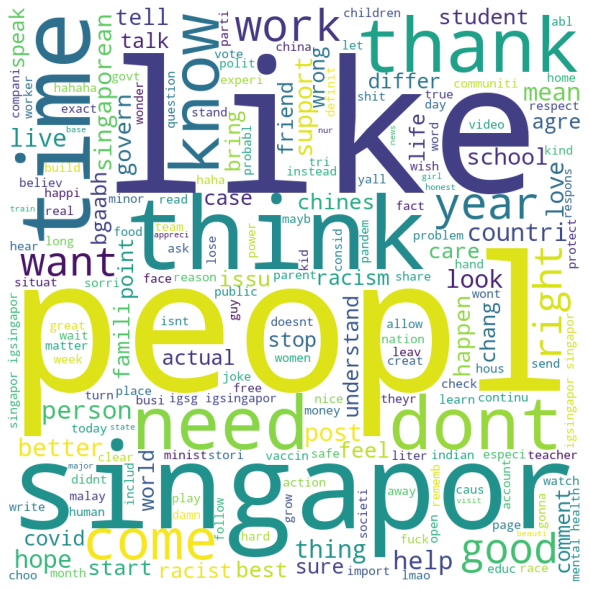

In [ ]:
comment_words = ''

for val in processed_docs:
   
     
    comment_words += " ".join(val)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = gensim.parsing.preprocessing.STOPWORDS,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#maps each word to their unique ID

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abus
1 allow
2 analys
3 articl
4 belief
5 bgaabh
6 bureaucrat
7 challeng
8 communiti
9 deeper
10 domest


Filter out tokens that appear in
- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number). Tokens that appear in more than 50% of the total corpus are also removed as default.
- after the above two steps, keep only the first 100000 most frequent tokens. Set to ‘None’ if you want to keep all.


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’

In [ ]:
processed_docs[8]

['repost', 'bgaabhdit']

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[2]

[(6, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1)]

In [ ]:
bow_doc_4310 = bow_corpus[8]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                    dictionary[bow_doc_4310[i][0]],
                                                    bow_doc_4310[i][1]))

Word 130 ("repost") appears 1 time.


TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [ ]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
# preview TF-IDF scores for our first document
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.21481306303915418),
 (1, 0.18654209784191406),
 (2, 0.21602225911546324),
 (3, 0.2563974327131265),
 (4, 0.17927020759797868),
 (5, 0.22150661721364207),
 (6, 0.17716911688050246),
 (7, 0.29711226286189757),
 (8, 0.26129058854981646),
 (9, 0.3042399824822698),
 (10, 0.23904227994534993),
 (11, 0.20411593231606914),
 (12, 0.38335991118811),
 (13, 0.24093125718587896),
 (14, 0.27714193195242354),
 (15, 0.2536236297164757)]


Running LDA using Bag of Words

Parameters for LDA model in gensim
Following are the important and commonly used parameters for LDA for implementing in the gensim package:

The corpus or the document-term matrix to be passed to the model (in our example is called doc_term_matrix)
Number of Topics: num_topics is the number of topics we want to extract from the corpus.
id2word: It is the mapping from word indices to words. Each of the words has an index that is present in the dictionary.
Number of Iterations: it is represented by Passes in Python. Another technical word for iterations is ‘epochs’. Passes control how often we want to train the model on the entire corpus for convergence.
Chunksize: It is the number of documents to be used in each training chunk. The chunksize controls how many documents can be processed at one time in the training algorithm.

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"best" + 0.009*"exact" + 0.008*"worker" + 0.008*"happen" + 0.008*"work" + 0.007*"know" + 0.006*"time" + 0.006*"friend" + 0.006*"famili" + 0.006*"dont"
Topic: 1 
Words: 0.035*"thank" + 0.019*"need" + 0.014*"peopl" + 0.011*"like" + 0.011*"help" + 0.010*"care" + 0.010*"dont" + 0.009*"hahaha" + 0.008*"feel" + 0.008*"mental"
Topic: 2 
Words: 0.033*"like" + 0.023*"peopl" + 0.018*"dont" + 0.010*"racist" + 0.010*"race" + 0.010*"love" + 0.010*"racism" + 0.009*"think" + 0.009*"singapor" + 0.009*"want"
Topic: 3 
Words: 0.018*"year" + 0.016*"singapor" + 0.014*"vaccin" + 0.014*"covid" + 0.013*"time" + 0.013*"happi" + 0.010*"nice" + 0.010*"school" + 0.008*"true" + 0.008*"good"
Topic: 4 
Words: 0.036*"singapor" + 0.016*"countri" + 0.012*"agre" + 0.011*"chines" + 0.009*"bgaabha" + 0.008*"bgaabhaw" + 0.008*"speak" + 0.008*"bgaabhan" + 0.007*"singaporean" + 0.007*"bgaabhag"
Topic: 5 
Words: 0.019*"think" + 0.016*"dont" + 0.014*"say" + 0.012*"peopl" + 0.010*"good" + 0.010*"that" + 

When looking at the coherence using the C_umass or C_v algorithm, the best is usually the max.

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(bow_corpus))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(bow_corpus))
#perplex=model.log_perplexity(corpus, total_docs=len(corpus))


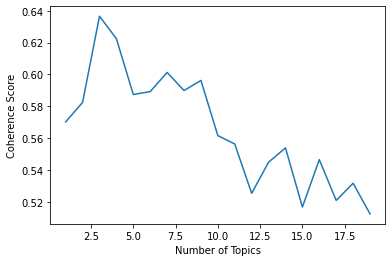

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = gensim.models.LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = gensim.models.CoherenceModel(model=lda_model, texts = processed_docs, corpus=bow_corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = gensim.models.LdaMulticore(corpus=bow_corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(documents["text"])

In [ ]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.1187284472543914 %


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

print("GridSearch:")

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
!pip install pyLDAvis -qq
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

     |████████████████████████████████| 1.7 MB 20.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


Running LDA using TF-IDF


In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = gensim.models.LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = gensim.models.CoherenceModel(model=lda_model, texts = processed_docs, corpus=bow_corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = gensim.models.LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = gensim.models.CoherenceModel(model=lda_model, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWord: {}'.format(idx, topic))

In [ ]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(lda_display)